Warning message:
"package 'data.table' was built under R version 3.5.3"

group.age
(20.5,25.4] (25.4,30.2] (30.2,35.1]   (35.1,40]   (40,44.8] (44.8,49.7] 
      13679       33127       38430       41758       40350       34311 
(49.7,54.5] (54.5,59.4] (59.4,64.3] (64.3,69.2] 
      33544       32650       27685       11977 

Warning message:
"package 'gridExtra' was built under R version 3.5.3"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


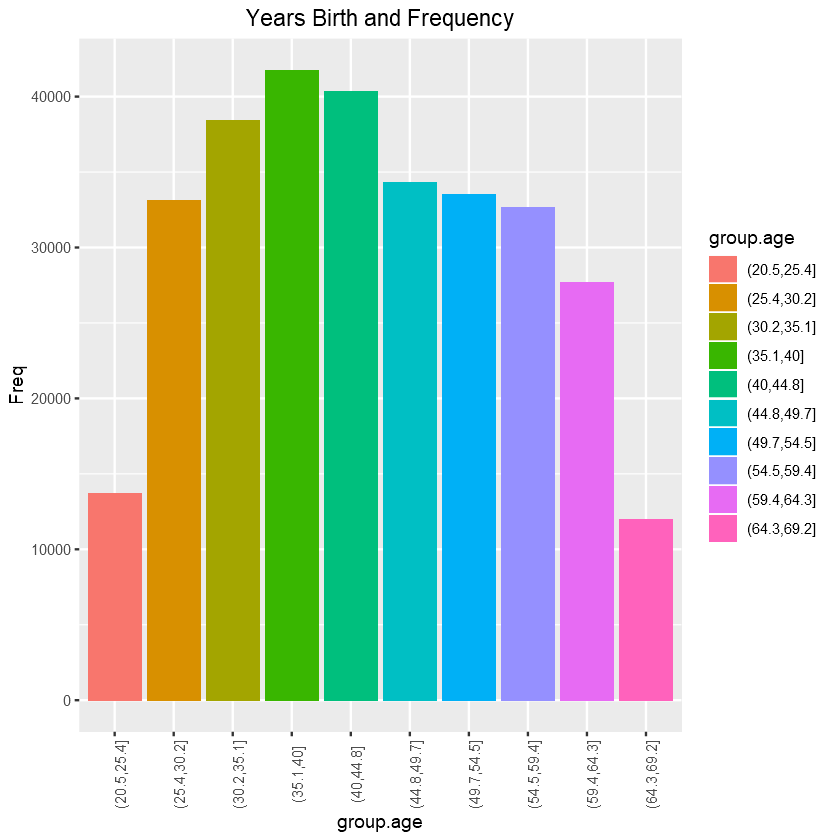

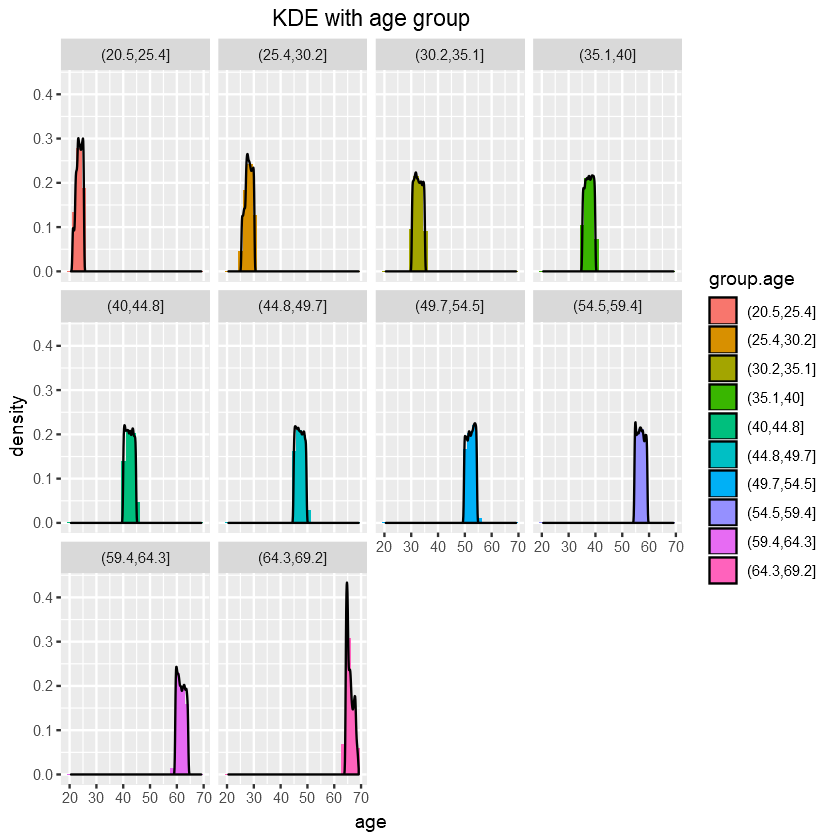

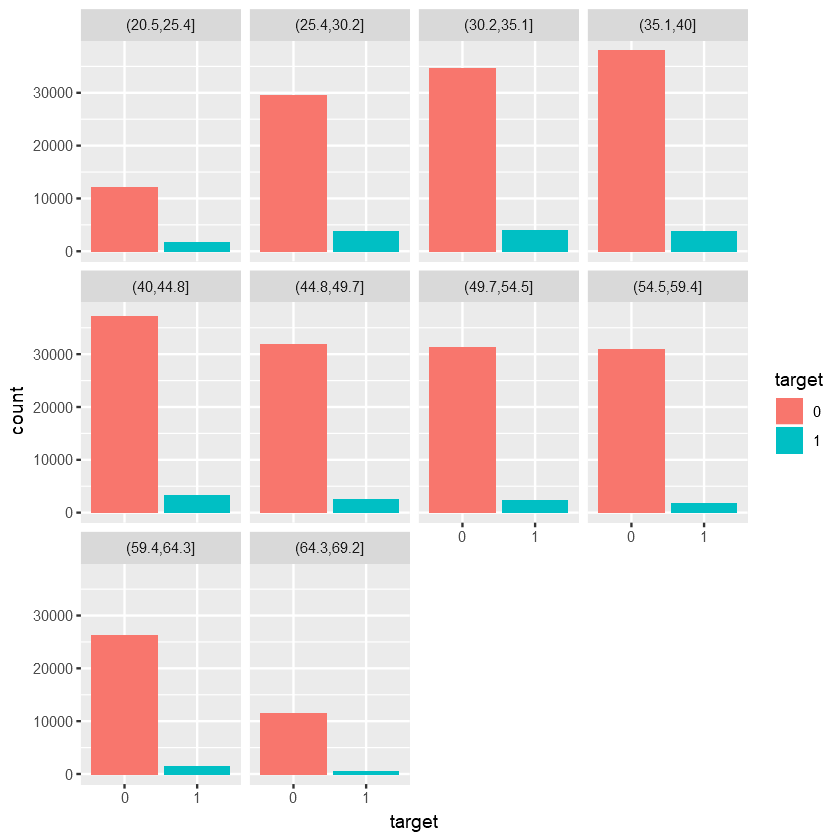

In [1]:
library(data.table)
library(ggplot2)
dat=fread('C:\\Users\\coco40725\\Documents\\GitHub\\2nd-ML100Days\\data\\application_train.csv')
age=abs(dat$DAYS_BIRTH)/365

## 切成10組
group.age=cut(age,breaks=10)
group.origin=data.frame(group.age=group.age,age=age,target=as.factor(dat$TARGET))

group.age.dat=as.data.frame(table(group.age))

plot.age=ggplot(data=group.age.dat,aes(x=group.age,y= Freq,fill=group.age))+
  geom_bar(stat = 'identity')+theme(axis.text.x = element_text(angle=90))+
  ggtitle('Years Birth and Frequency')+theme(plot.title = element_text(hjust = 0.5))
table(group.age)
plot.age

## 10組 kde
library(gridExtra)

plot.kde=ggplot(data=group.origin)+
  geom_histogram(aes(x=age,y=..density..,fill=group.age),position="identity")+
  geom_density(aes(x=age,y=..density..))+
  facet_wrap(~group.age)+  
  ggtitle('KDE with age group')+theme(plot.title = element_text(hjust = 0.5))
plot.kde

##以年齡區間為 x, target 為 y 繪製 barplot
plot.bar.age=ggplot(data =group.origin )+
  geom_bar(aes(x=target,fill=target))+facet_wrap(~group.age)
plot.bar.age